<a href="https://colab.research.google.com/github/deepakbastola/AI_Science_Medicine/blob/main/Random_Walk_MNIST_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from skimage.util import montage

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
#MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

In [ ]:
x = X[10,0,:,:]

In [ ]:
x.shape

(28, 28)

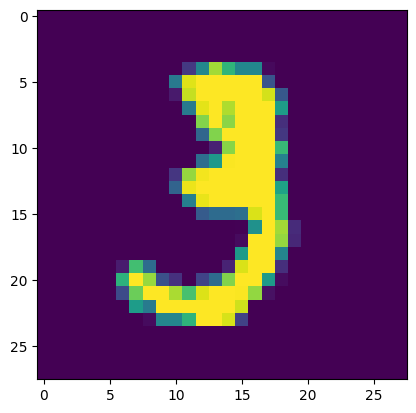

In [ ]:
plt.imshow(x)

In [ ]:
a = np.random.random((5,1))

In [ ]:


a

array([[0.75895092],
       [0.10532699],
       [0.67583819],
       [0.36165665],
       [0.60886312]])

In [ ]:
a.T

array([[0.75895092, 0.10532699, 0.67583819, 0.36165665, 0.60886312]])

In [ ]:
b = np.random.random((5,5))

In [ ]:
b.shape,a.shape

((5, 5), (5, 1))

In [ ]:
b@a

array([[1.2801115 ],
       [1.74522863],
       [1.65823966],
       [1.65106164],
       [1.08660464]])

In [ ]:
b = np.random.random((2,5))

In [ ]:
b@a

array([[1.25732313],
       [1.18370903]])

In [ ]:
b.shape,a.shape

((2, 5), (5, 1))

In [ ]:
x = np.random.random((784,1))

In [ ]:
x.shape

(784, 1)

In [ ]:
m = np.random.random((10,784))

In [ ]:
m@x

array([[193.87495658],
       [192.62822224],
       [190.45723889],
       [187.56434672],
       [185.5888812 ],
       [187.815661  ],
       [191.83430109],
       [191.84777962],
       [190.54154672],
       [186.76312524]])

In [ ]:
y = m@x

In [ ]:
y.shape

(10, 1)

In [ ]:
m.shape,x.shape

((10, 784), (784, 1))

In [ ]:
np.max(y)

193.87495658463067

In [ ]:
np.argmax(y)

0

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X.shape[1]

1

In [ ]:
X.shape[2]

28

In [ ]:
X = X.reshape(X.shape[0],X.shape[2]*X.shape[3])

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = X.T

In [ ]:
m = np.random.standard_normal((10,784))

In [ ]:
m.shape,X.shape

((10, 784), (784, 60000))

In [ ]:
y = m@X

In [ ]:
y.shape

(10, 60000)

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
y.shape

(60000,)

In [ ]:
Y.shape

(60000,)

In [ ]:
y

array([6, 9, 6, ..., 6, 9, 4])

In [ ]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
y == Y

array([False, False, False, ..., False, False, False])

In [ ]:
np.sum(y == Y)

5682

In [ ]:
len(Y)

60000

In [ ]:
acc = np.sum(y == Y)/len(Y)

In [ ]:
acc

0.0947

In [ ]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == Y)/len(Y)

print(acc)

0.10495


In [ ]:
acc_best = 0
m_best = 0

for i in range(100):

    m = np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best:
        acc_best = acc
        m_best = m

        print(acc_best)

0.05591666666666667
0.12541666666666668
0.1513
0.17286666666666667
0.1862


In [ ]:
acc_best = 0
m_best = 0

for i in range(10000):

    m = m_best + np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best:
        acc_best = acc
        m_best = m

        print(acc_best)

0.06936666666666666
0.13363333333333333
0.14995
0.16803333333333334
0.1813
0.1843
0.19786666666666666
0.20061666666666667
0.20516666666666666
0.21011666666666667
0.21701666666666666
0.22741666666666666
0.24216666666666667
0.24801666666666666
0.2754666666666667
0.27648333333333336
0.27923333333333333
0.2873
0.28786666666666666
0.29075
0.30135
0.30215
0.31235
0.31321666666666664
0.3147333333333333
0.32066666666666666
0.33068333333333333
0.3323833333333333
0.33475
0.3367833333333333
0.3377
0.3377833333333333
0.34141666666666665
0.3505333333333333
0.35538333333333333
0.35805
0.3611333333333333
0.36293333333333333
0.36305
0.36638333333333334
0.3687
0.3716333333333333
0.37175
0.37223333333333336
0.37583333333333335
0.37998333333333334
0.387
0.3914166666666667
0.3916
0.39286666666666664
0.39795
0.39876666666666666
0.4010166666666667
0.41481666666666667
0.4184833333333333
0.4301333333333333
0.43155
0.4322666666666667
0.43316666666666664
0.43821666666666664
0.44345
0.44555
0.45365
0.45968333333

In [ ]:
m_best = 0 
acc_best = 0

for i in range(1000):
    
    m = np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

<ipython-input-52-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1) 
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

tensor([0.1939, 0.1614, 0.1581, 0.1515, 0.1445, 0.1439, 0.1409, 0.1407, 0.1391,
        0.1381, 0.1374, 0.1354, 0.1352, 0.1343, 0.1331, 0.1330, 0.1328, 0.1319,
        0.1316, 0.1294, 0.1294, 0.1293, 0.1289, 0.1278, 0.1278, 0.1277, 0.1273,
        0.1265, 0.1261, 0.1259, 0.1255, 0.1254, 0.1249, 0.1230, 0.1223, 0.1199,
        0.1196, 0.1196, 0.1189, 0.1185, 0.1172, 0.1165, 0.1157, 0.1138, 0.1095,
        0.1079, 0.1073, 0.1072, 0.1054, 0.1051, 0.1043, 0.1035, 0.1027, 0.1024,
        0.1013, 0.1012, 0.0997, 0.0997, 0.0994, 0.0992, 0.0984, 0.0969, 0.0963,
        0.0953, 0.0949, 0.0948, 0.0945, 0.0941, 0.0929, 0.0927, 0.0923, 0.0921,
        0.0912, 0.0901, 0.0890, 0.0884, 0.0857, 0.0845, 0.0841, 0.0840, 0.0787,
        0.0782, 0.0775, 0.0768, 0.0768, 0.0750, 0.0744, 0.0739, 0.0738, 0.0737,
        0.0720, 0.0704, 0.0691, 0.0671, 0.0655, 0.0644, 0.0621, 0.0600, 0.0409,
        0.0320], device='cuda:0')